<a href="https://colab.research.google.com/github/mehekakkhan/AIinIndustry_MehekKhan/blob/main/FineTuned_ResNetModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import (ResNet50,
preprocess_input, decode_predictions)

In [25]:
import os

In [26]:
import matplotlib.pyplot as plt


In [27]:
img_height, img_width = 224, 224
batch_size = 32

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')



In [28]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='binary',
    validation_split=0.2,
    subset='training',
    seed=1337
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='binary',
    validation_split=0.2,
    subset='validation',
    seed=1337
)



Found 2000 files belonging to 2 classes.
Using 1600 files for training.
Found 2000 files belonging to 2 classes.
Using 400 files for validation.


In [29]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)



In [30]:

base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))


In [31]:
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
predictions = tf.keras.layers.Dense(1, activation='sigmoid')(x)


model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

In [32]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [42]:
epochs = 15
history=model.fit(train_dataset, epochs=epochs, validation_data=validation_dataset)


Epoch 1/15
50/50 [==============================] - 18s 348ms/step - loss: 8.3304e-05 - accuracy: 1.0000 - val_loss: 0.1087 - val_accuracy: 0.9675
Epoch 2/15
50/50 [==============================] - 18s 354ms/step - loss: 1.0800e-04 - accuracy: 1.0000 - val_loss: 0.1120 - val_accuracy: 0.9700
Epoch 3/15
50/50 [==============================] - 18s 356ms/step - loss: 1.8393e-04 - accuracy: 1.0000 - val_loss: 0.1068 - val_accuracy: 0.9725
Epoch 4/15
50/50 [==============================] - 18s 349ms/step - loss: 6.5738e-05 - accuracy: 1.0000 - val_loss: 0.1080 - val_accuracy: 0.9725
Epoch 5/15
50/50 [==============================] - 18s 349ms/step - loss: 5.8416e-05 - accuracy: 1.0000 - val_loss: 0.1088 - val_accuracy: 0.9725
Epoch 6/15
50/50 [==============================] - 18s 350ms/step - loss: 6.4308e-05 - accuracy: 1.0000 - val_loss: 0.1144 - val_accuracy: 0.9725
Epoch 7/15
50/50 [==============================] - 18s 357ms/step - loss: 1.3835e-04 - accuracy: 1.0000 - val_loss: 0

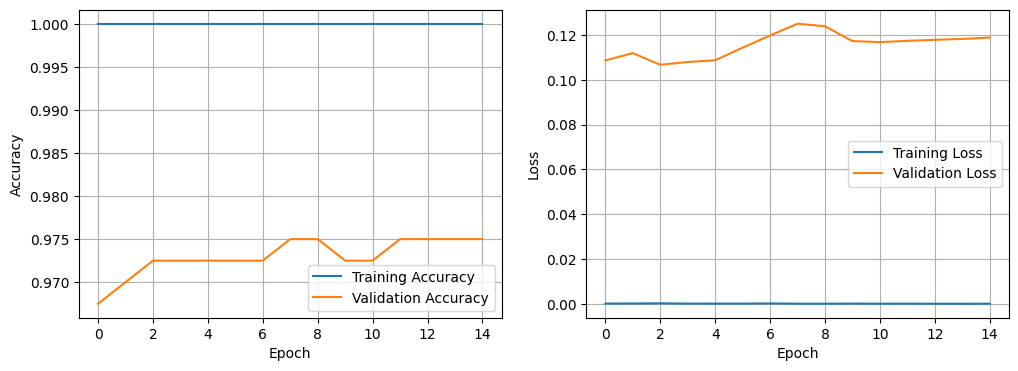

In [43]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()